<a href="https://colab.research.google.com/github/Aqillaaprly/ML_2025/blob/main/QUIZ_1_2341720068_AQILLA_APRILY_KURNIA_SARI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**QUIZ 1_AQILLA APRILY KURNIA SARI_3I_2341720068**

# LOAD DATA AND INSPECT METADATA

In [ ]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [ ]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Data Size
df.shape

(48842, 15)

In [ ]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# PART 1 - DATA LOADING AND DATA MANIPULATION

## TASK 1
1. Do inspection to get the information about dataset
2. Which variable(s) has missing values? How many is it?

In [ ]:
# Missing values
missing_values = df.isnull().sum()

# Missing values question mark
missing_values_mark = (df == '?').sum()

# All missing values
missing_total = missing_values + missing_values_mark

# Data frame
missing_summary = pd.DataFrame({
    "Missing (NaN)": missing_values,
    "Missing (?)": missing_values_mark,
    "Total Missing": missing_total
})
missing_summary = missing_summary[missing_summary["Total Missing"] > 0]

print("Variables with missing values:\n")
print(missing_summary)

Variables with missing values:

                Missing (NaN)  Missing (?)  Total Missing
workclass                 963         1836           2799
occupation                966         1843           2809
native-country            274          583            857


## TASK 2
1. Perform data imputation on missing values.
2. Verified the missing values for each variable. Is it still there?

In [ ]:
# replace ? to Nan
df.replace("?", np.nan, inplace=True)

In [ ]:
# impute Nan with mode
for col in ["workclass", "occupation", "native-country"]:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after imputation:\n")
print(df.isnull().sum())

Missing values after imputation:

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


/tmp/ipython-input-2317246194.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


## TASK 3
Do inspection to all the quantitative variables (features). If you found an inappropriate value(s), replace it with 'Others'. Also, if you found any typos value(s), fix the typos.

In [ ]:
# Check the data types
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [ ]:
# separated numeric and categorical
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical columns:", list(categorical_cols))
print("\nNumeric columns summary:")
print(df[numeric_cols].describe())

# Cek unique values dari tiap variabel kategorikal
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

# Check the unapropriate values
print("Age < 0 :", (df['age'] < 0).sum())
print("Age > 100 :", (df['age'] > 100).sum())

print("Work hours < 1 :", (df['hours-per-week'] < 1).sum())
print("Work hours > 100 :", (df['hours-per-week'] > 100).sum())

print("Capital-gain < 0 :", (df['capital-gain'] < 0).sum())
print("Capital-loss < 0 :", (df['capital-loss'] < 0).sum())

# replace to others
df['age'] = df['age'].apply(lambda x: 'Others' if x < 16 or x > 90 else x)
df['hours-per-week'] = df['hours-per-week'].apply(lambda x: 'Others' if x < 1 or x > 100 else x)

# Fix typos
df['sex'] = df['sex'].replace({'Malee': 'Male', 'female': 'Female'})
df['native-country'] = df['native-country'].replace({'Unite-States': 'United-States'})
df['race'] = df['race'].replace({'Whte': 'White'})
df['workclass'] = df['workclass'].replace({'Self-emp-not-inc.': 'Self-emp-not-inc'})

# Step 5: Confirm replacements
print("\n=== Recheck After Fixing ===")
print("Unique values in 'age':", df['age'].unique())
print("Unique values in 'hours-per-week':", df['hours-per-week'].unique())


Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

Numeric columns summary:
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.00

# PART 2 - VISUAL INSPECTION

## TASK 1 - DATA VISUALIZATION
Do inspection on this following variabels,

1. On the 'age' by using a histogram
2. On the 'education' using a barchart
3. On the 'income' to 'hours_per_week' by using a boxplot (grouped by income)
4. On the 'age' to 'capital-gain' and 'capital-loss' using lineplot (lineplot with multiple x-data)


Text(0.5, 1.0, 'Histogram of Age')

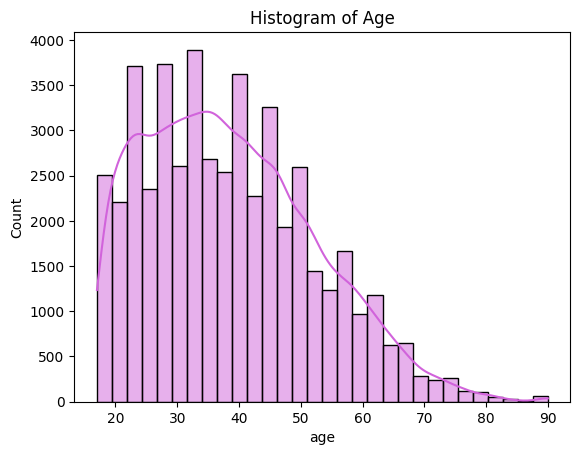

In [ ]:
# HISTOGRAM
sns.histplot(df['age'], bins=30, kde=True, color='#d163db')
plt.title("Histogram of Age")

/tmp/ipython-input-3780631372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='education', data=df, order=df['education'].value_counts().index, palette='magma')


Text(0.5, 1.0, 'Bar Chart of Education')

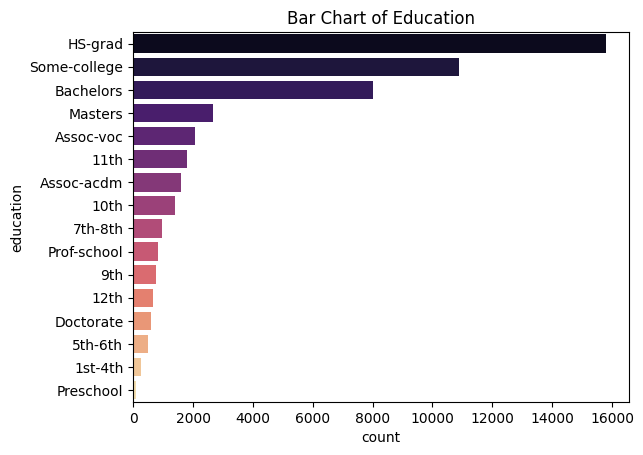

In [ ]:
# BARCHART
sns.countplot(y='education', data=df, order=df['education'].value_counts().index, palette='magma')
plt.title("Bar Chart of Education")

Text(0.5, 1.0, 'Boxplot of Hours per Week by Income')

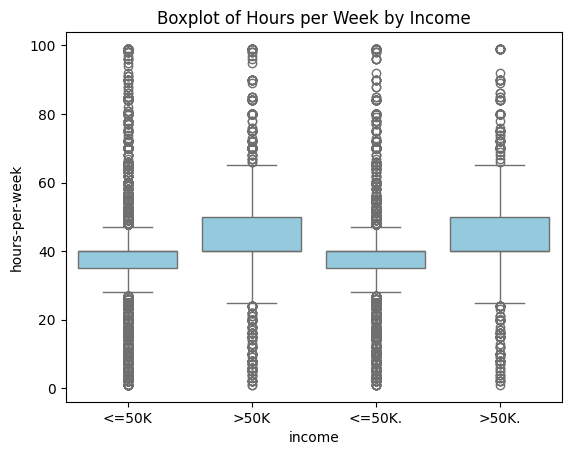

In [ ]:
#BOXPLOT
sns.boxplot(x='income', y='hours-per-week', data=df, color='skyblue')
plt.title("Boxplot of Hours per Week by Income")

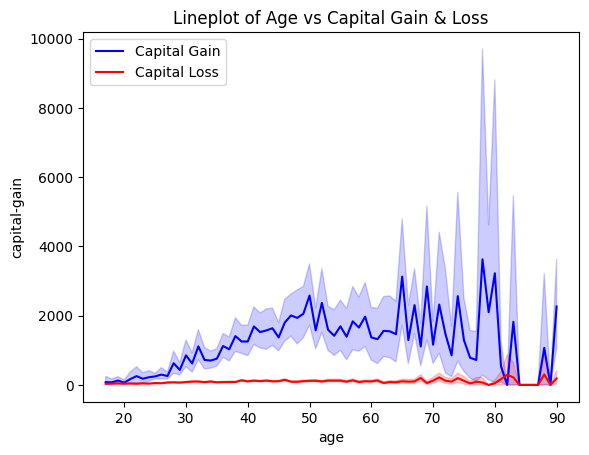

In [ ]:
sns.lineplot(x='age', y='capital-gain', data=df, label="Capital Gain", color="blue")
sns.lineplot(x='age', y='capital-loss', data=df, label="Capital Loss", color="red")
plt.title("Lineplot of Age vs Capital Gain & Loss")
plt.legend()
plt.show()

## TASK 2 - VISUAL ANALYSIS
1. What kind of distribution showed in 'age'?
2. If you find missing values in 'age', what kind of data impute method will you use? Why?
3. How many outliner for each category (group) in 'income' related to 'hour-per-week'? Which category has more outlier?


In [ ]:
'''
# 1. Distribution of 'age' (Histogram)
- The histogram of 'age' shows a right-skewed (positively skewed) distribution.
- Most individuals are concentrated in the productive age range (20–50 years), and the frequency decreases as age increases.
- Very few individuals are above 70 years old.
'''

'''
# 2. Imputation for 'age' if missing values exist
 Since 'age' is continuous and not normal distribution, the best imputation method is the median.
 because :
 - The mean is sensitive to outliers.
 - The median is more robust and representative of central tendency.
 '''

'''
# 3. Outliers in 'hours_per_week' grouped by 'income' (Boxplot)
- Both categories (<=50K and >50K) have many outliers, especially at the high end (80–100 hours/week).
- There are also some outliers on the low end (1–5 hours/week).
- The '<=50K' category shows more outliers overall because the group size is much larger.
- The '>50K' group has fewer total outliers, but still shows extreme cases.
'''

"\n# 3. Outliers in 'hours_per_week' grouped by 'income' (Boxplot)\n- Both categories (<=50K and >50K) have many outliers, especially at the high end (80–100 hours/week).\n- There are also some outliers on the low end (1–5 hours/week).\n- The '<=50K' category shows more outliers overall because the group size is much larger.\n- The '>50K' group has fewer total outliers, but still shows extreme cases.\n"

# PART 3 - ENCODING IN CATEGORICAL VARIABLE

## TASK 1
Do encoding process on 'Sex' and 'Income', while 'Income' is target variable.

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Make sure the data type
df['sex'] = df['sex'].astype(str)
df['income'] = df['income'].astype(str)

le_sex = LabelEncoder()
le_income = LabelEncoder()

# Encode
df['sex'] = le_sex.fit_transform(df['sex'])
df['income'] = le_income.fit_transform(df['income'])

print("Data after encoding:")
print(df[['sex', 'income']].head(10))


Data after encoding:
   sex  income
0    1       0
1    1       0
2    1       0
3    1       0
4    0       0
5    0       0
6    0       0
7    1       2
8    0       2
9    1       2


# PART 4 - CORRELATION ANALYSIS

## TASK 1
1. Do correlation analysis on the following variabels: 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', and 'income' (encoded version from previous task)
2. Based on the result, what kind of information you get?

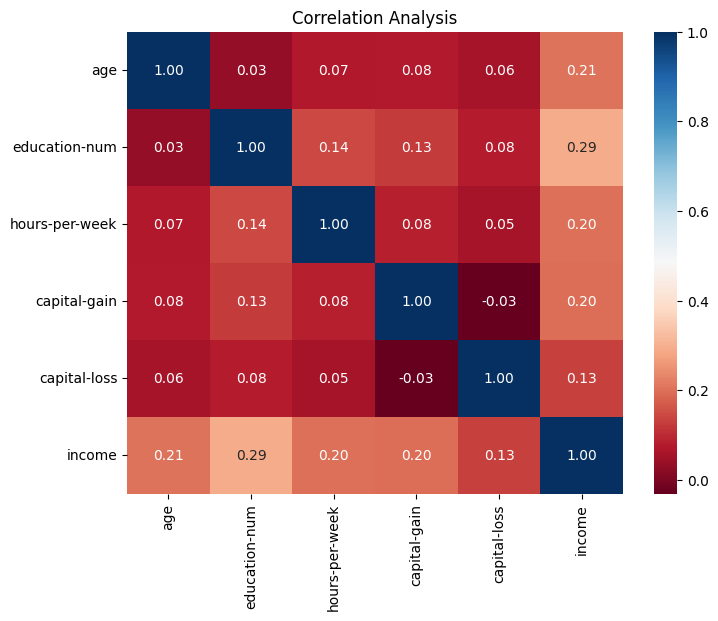

Correlation with income:
income            1.000000
education-num     0.291074
age               0.205173
hours-per-week    0.198890
capital-gain      0.195755
capital-loss      0.129771
Name: income, dtype: float64


In [ ]:
cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']

corr_matrix = df[cols].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu", fmt=".2f")
plt.title("Correlation Analysis")
plt.show()

print("Correlation with income:")
print(corr_matrix['income'].sort_values(ascending=False))

In [ ]:
# Correlation Analysis Interpretation

'''
1. Age:
   - Very weak positive correlation with income (0.10).
   - Suggests older individuals are slightly more likely to have higher income.

2. Education-num:
   - Highest correlation with income (0.14).
   - More years of education are associated with higher income.

3. Hours-per-week:
   - Weak positive correlation with income (0.09).
   - People who work more hours tend to earn more, but not strongly.

4. Capital-gain:
   - Weak correlation with income (0.09).
   - Higher capital-gain is linked to higher income, which makes sense since
     gains typically come from investments.

5. Capital-loss:
   - Very weak correlation with income (0.06).
   - Not a strong determinant for income.

# Overall correlation :
- All correlations are weak (close to 0), meaning no single variable strongly explains income.
- Among them, education (education-num) has the strongest link to income.
- This indicates income is influenced by multiple factors together rather than just one.
'''


'\n1. Age:\n   - Very weak positive correlation with income (0.10).\n   - Suggests older individuals are slightly more likely to have higher income.\n\n2. Education-num:\n   - Highest correlation with income (0.14).\n   - More years of education are associated with higher income.\n\n3. Hours-per-week:\n   - Weak positive correlation with income (0.09).\n   - People who work more hours tend to earn more, but not strongly.\n\n4. Capital-gain:\n   - Weak correlation with income (0.09).\n   - Higher capital-gain is linked to higher income, which makes sense since \n     gains typically come from investments.\n\n5. Capital-loss:\n   - Very weak correlation with income (0.06).\n   - Not a strong determinant for income.\n\n# Overall correlation :\n- All correlations are weak (close to 0), meaning no single variable strongly explains income.\n- Among them, education (education-num) has the strongest link to income.\n- This indicates income is influenced by multiple factors together rather than

# PART 5 - PREPROCESSING IN MNIST DATASET
In this part, you need to perform EDA and simple preprocessing on MNIST dataset. This dataset contain images of handwritten digit from 0 to 9. A pre configuration is provided to help you to load the data and inspect some images.

Hints:

You only need to use the Test set.
You need to perform to all of images in test set (10k images). You may need a function to complete this task (optional).


In [ ]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


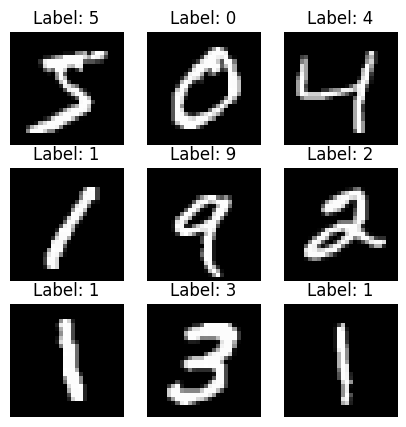

In [ ]:
# Visual Inspection
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## TASK 1
1. Perform upsampling on the images to 32x32
2. Show the 5 sample of the result.

Hint: You need to store the result in an empty array. Replacing data to the X_test cannot be done due to the shape of the array (10000, (28,28)). You need to create an array which match with the size of the new images.

New test shape after upsampling: (10000, 32, 32)


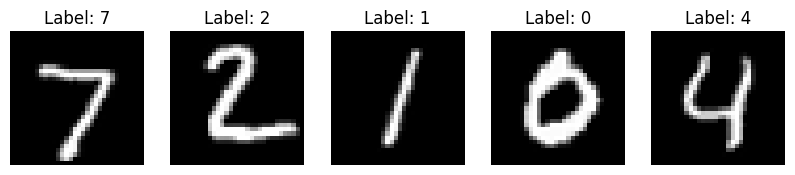

In [ ]:
import cv2
X_test_upsampled = np.zeros((X_test.shape[0], 32, 32))
for i in range(X_test.shape[0]):
    X_test_upsampled[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)

print("New test shape after upsampling:", X_test_upsampled.shape)

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test_upsampled[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()


## TASK 2
Perform normalization, so the pixel value will have a value in range of 0 until 1

In [ ]:
# Normalize pixel values to range [0,1]
X_test_norm = X_test_upsampled / 255.0

print("Min pixel value after normalization:", X_test_norm.min())
print("Max pixel value after normalization:", X_test_norm.max())

Min pixel value after normalization: 0.0
Max pixel value after normalization: 1.0


## TASK 3
Transform / reshape the images into 1 dimensional array. Do it to the all images (after resizing and normalization).

Hint: You may need an empty array to store the result

In [ ]:
# TASK 3: Reshape images into 1D array (flatten)
X_test_flat = X_test_norm.reshape(X_test_norm.shape[0], -1)  # (10000, 1024)

print("New shape after flattening:", X_test_flat.shape)

# Show 5 flattened samples (first 10 values only for readability)
for i in range(5):
    print(f"Label: {y_test[i]} → Flattened values (first 10): {X_test_flat[i][:10]}")

New shape after flattening: (10000, 1024)
Label: 7 → Flattened values (first 10): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label: 2 → Flattened values (first 10): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label: 1 → Flattened values (first 10): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label: 0 → Flattened values (first 10): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label: 4 → Flattened values (first 10): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
